## Clustering - Extraindo Padrões dos Dados

- Dsenvolvedor: Júlia Eduarda Miranda de Sousa
- Descrição: Códigos e anotações desenvolvidos durante o curso da Alura de clusterização.
- Data de Criação: 23/08/2025

### Aprendizado Supervisionado x Não Supervisionado

As formas de aprendizado supervisionado e não supervisionado consistem em técninas de inteligência artificial, mas especificamente, de aprendizado de máquina. 

Com aprendizado supervisionado, o modelo terá dados adicionais de contexto para aprender através do fornecimento dos rótulos da variável de saída. O modelo utiliza os dados dos rótulos para ajustes no aprendizado e minimazação de erros de forma iterativa. Isso permite verificar se a resposta predita pelo modelo está correta. Já os algoritmos de aprendizado não supervisionado aprendem de forma independente, aprendendo a estrutura e padrões inerentes dos dados sem o contexto adicional dos rótulos da variável de saída.

As duas abordagens são utilizadas em diferentes situações, o aprendizado supervisionado tem a função de entender a relação dos dados de entrada com os dados de saída e o aprendizado não supervisionado tem a função de identificar novos padrões e relações entre dados brutos e não rotulados.

Consulte: <https://cloud.google.com/discover/supervised-vs-unsupervised-learning?hl=pt-BR>


### Instalando os pacotes necessários


Criando um kernel para o seu ambiente virtual:

- Criação de ambiente virtual

      python -m venv <nome_env>

- Instale o pacote ipykernel:

      python -m pip install ipykernel

- Instalando um kernel com o nome <nome_env> (substituir para o nome do seu ambiente)

      python -m ipykernel install --user --name .<nome_env>

- Execute o notebook dentro do ambiente ativado e em seguida selecione o novo kernel criado

      jupyter notebook

Referência: <https://stackoverflow.com/questions/55448244/using-virtualenv-on-jupyter-notebook>


In [1]:
!pip install pandas

     ---------------------------------------- 11.3/11.3 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 13.1/13.1 MB 2.1 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn

     ---------------------------------------- 8.9/8.9 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 4.1 MB/s eta 0:00:00
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
!pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 225.2/225.2 kB 3.4 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.3/2.3 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 4.6 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Atualizando o arquivo de dependências

In [4]:
!pip freeze > requirements.txt

### Realizando a leitura dos dados

In [13]:
# Importando a bilioteca pandas para manipulação dos dados
import pandas as pd

# Lendo os dados do arquivo csv
dataframe = pd.read_csv('database/CC GENERAL.csv')
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)

# Exibindo o dataset
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [14]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [16]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [17]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [20]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3644845919974304


In [21]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0757138590613295


In [22]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7937428414293


In [23]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    
    return s, dbs, calinski

In [26]:
import numpy as np

s2, dbs2, calinski2 = clustering_algorithm(5, values)
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)

print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03924298851493366 3.5189176485721183 300.8148131605044
0.36451629718246037 1.075378953363056 3431.7934156739775


In [27]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3688486109603572 1.058820211490599 1204.0640491384652
0.35406999696241026 1.1389554530299946 1194.945411949724
0.3668564117315988 1.0993525253456349 1167.5313082261503


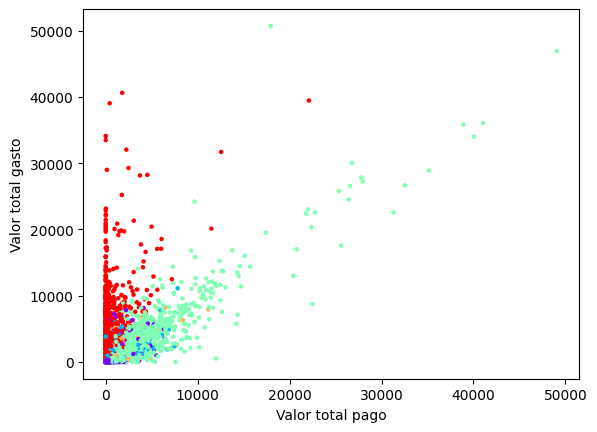

In [30]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")

plt.show()

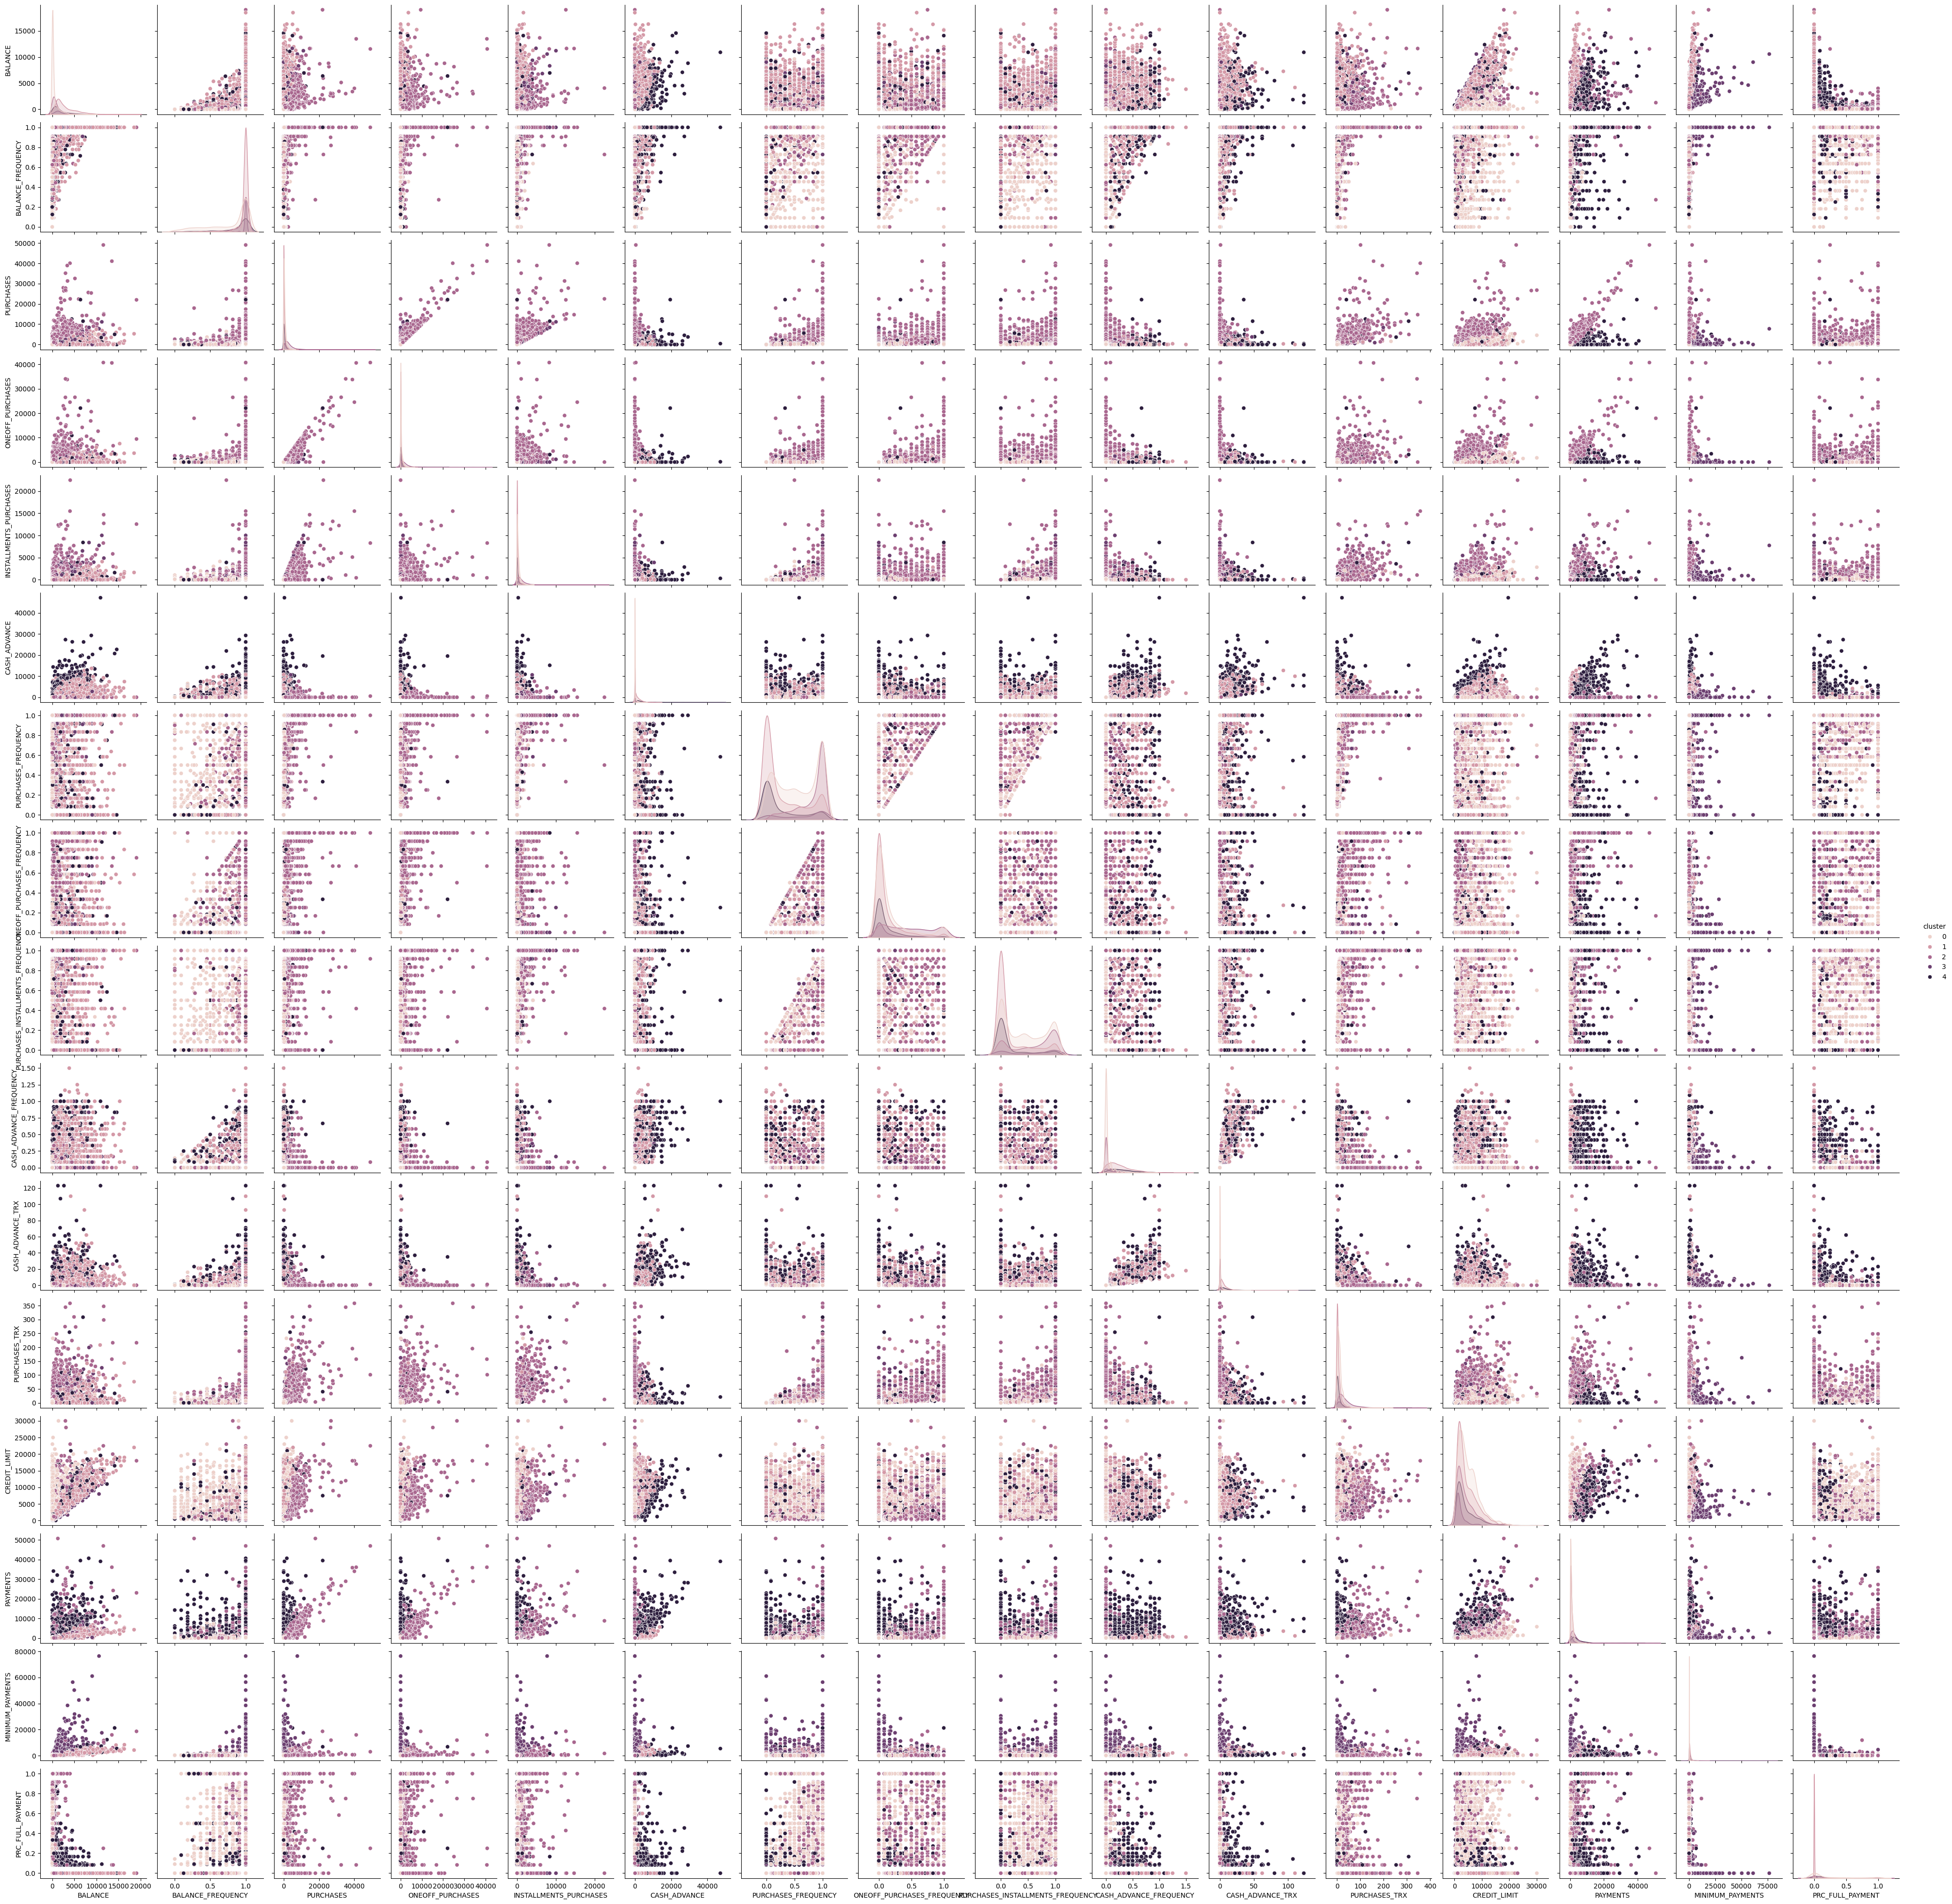

In [33]:
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [34]:
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3278.0   443.992358   846.597972   0.000000    23.315538   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1540.0  1142.222657  1664.035755   0.000000   211.566656   
3         411.0  1987.501586  1854.459156  70.794108  1018.958891   
4        1072.0  1794.024195  1982.950586   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.992153   411.193793   9630.367575            3278.0  0.774417   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2         554.332740  1370.859355  19043.138560            1540.0  0.928053   
3        1337.287314  2138.678431  11670.179850             411.0  0.989486   
4        1087.920500  2308.762488  14581.459140            1072.0  0.862131   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.800040   4483.503862           3278.0  0.246549   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       524.184580  18621.013310           1540.0  0.278582   
3        ...      7112.618584  76406.207520            411.0  0.019318   
4        ...       884.718306  21235.065300           1072.0  0.117384   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346601  0.0  0.0  0.000000  0.444444  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.367203  0.0  0.0  0.083333  0.545455  1.0  
3        0.090901  0.0  0.0  0.000000  0.000000  1.0  
4        0.186853  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

### Calculando os Centroides dos Clusters

A função abaixo retorna os valores dos atributos dos pontos centroides de cada clusters. Esses centroides podem ser utilizados para ser realizada a seleção dos atributos mais importantes para a análise dos clusters, por meio do cálculo da variância desses atributos.

Os atributos mais interessantes são aqueles que apresentam valores diferentes entre cada cluster, ou seja, aquele atributo contribui na diferenciação de um cluster do outro. Nesse caso, procuramos maiores valores de variância.

In [36]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91386971e-02 2.30552524e-04 1.21267798e-01 4.80255998e-02
  7.33425496e-02 2.43607736e-02 1.72581896e-04 3.37097813e-05
  1.40021986e-04 7.93309218e-06 1.24113667e-04 2.86037895e-03
  9.43728649e-01 1.53557708e-01 5.68217245e-02 7.57977264e-05]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [1.59699490e-01 2.45649360e-04 4.38116859e-01 2.56325660e-01
  1.81962376e-01 2.57889184e-02 2.04826443e-04 8.87914942e-05
  1.51162866e-04 9.36296056e-06 1.69350945e-04 6.17145756e-03
  6.04336246e-01 4.02584838e-01 8.54128174e-02 7.26645255e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [2.

### Calculando o Desvio Padrão dos Atributos

O cálculo do desvio padrão entre os atributos auxilia na identificação daqueles que apresentam maior diferenciação entre os clusters, ou seja, ajudam na análise dos clusters. Aquele com maior variância serão escolhidos.

In [38]:
max = len(centroids[0])

for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [45]:
description = dataframe.groupby('cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
n_clients = description.size()
means = description.mean()
means['n_clients'] = n_clients

print(means)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.992358   629.345171    141.569301   5132.945933   814.477150   
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
2        1142.222657  3268.886929    183.019398   4097.701397  3037.241495   
3        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
4        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   

         n_clients  
cluster             
0             3278  
1             2649  
2             1540  
3              411  
4             1072  
